# Data Science Analysis of  Sydney Housing prices

## Group i

>Arnesh Chakrabarti: **45333793** |
Dominic Law: **45397724** |
Luke McLean: **44617585** |
Taiga Takeda: **45248877**

**Data obtained via Domain at: (link: https://developer.domain.com.au/docs/introduction)**

## Introduction
Sydney is the capital state of New South Wales and is the most popular city in Australia and Oceania. The state has 658 suburbs, which consists of 40 local government areas and 15 contiguous regions. Due to its popularity, housing prices in Australia nowadays are expensive and can roughly cost around $850,000, more or less, in specific locations. However, housing prices mostly depend on the size, room and spacing they have.

## Aim and Goals

The aim of our project is to predict the housing price of each local government council areas (LGCA) in Sydney. The housing prices are categorised into groups by the number of __bathrooms, rooms, car spaces and other features__ they have.
   
The outcome of this project can help users to predict the housing price of their destined area, as well as how many rooms, bathrooms and other features they desire.

Our goal includes:
* Regression, RFE analysis and correlation matrices of the produced factors. Only the best of these factors are considered and utilised for further analysis
* Exploration of the data by inputting various graphs such as histograms, clustered bar charts and scatter plots

## Our Data

We are using **Domain's** API website (link: https://developer.domain.com.au/docs/introduction) to get data on the Sydney Housing Market.
We will use the get command weekly for n weeks as the free version allows only < 300 results per request.
The data returned is in a JSON format which we will use an online converter to change to CSV.
The CSV files have the following column names 
`['unitNumber', 'streetNumber', 'streetName', 'streetType', 'suburb', 'postcode', 'state', 'geoLocation__latitude', 'geoLocation__longitude', 'propertyType', 'bedrooms', 'bathrooms', 'carspaces', 'price', 'result', 'agent', 'id', 'agencyId', 'agencyName', 'agencyProfilePageUrl', 'propertyDetailsUrl']`
The data should be usable for most of them. Some data preparation will have to be implemented to deal with null values, especially for empty cells, such as `['unitNumber']` as it is not necessary.
We will need to make API calls weekly (preferably after the weekend) to ensure that we have a large enough dataset to analyse.

### Importing Libraries

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
sns.set_style('darkgrid')
%matplotlib inline


#-Linear/ Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#-Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#-KMeans Clustering
from sklearn.cluster import KMeans

#-feature selection
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

#-data processing
from sklearn import preprocessing

#-for 3d graph visualisation
from mpl_toolkits.mplot3d import Axes3D

#-clean up and get rid off errors
import warnings
warnings.filterwarnings("ignore")


### Read and Join data

In [4]:
#Read
house_sales_1 = pd.read_csv('data/nswSales_1.csv')
house_sales_2 = pd.read_csv('data/nswSales_2.csv')
house_sales_3 = pd.read_csv('data/nswSales_3.csv')
house_sales_4 = pd.read_csv('data/nswSales_4.csv')
house_sales_5 = pd.read_csv('data/nswSales_5.csv')
house_sales_6 = pd.read_csv('data/nswSales_6.csv')
house_sales_7 = pd.read_csv('data/nswSales_7.csv')
#house_sales_8 = pd.read_csv('data/nswSales_8.csv')

#Join
df = house_sales_1.append(house_sales_2, ignore_index=True, sort=True)
df = df.append(house_sales_3, ignore_index=True, sort=True)
df = df.append(house_sales_4, ignore_index=True, sort=True)
df = df.append(house_sales_5, ignore_index=True, sort=True)
df = df.append(house_sales_6, ignore_index=True, sort=True)
df = df.append(house_sales_7, ignore_index=True, sort=True)
#df = df.append(house_sales_8, ignore_index=True, sort=True)

#status
print(df.shape)
df.head()

(2204, 21)


,agencyId,agencyName,agencyProfilePageUrl,agent,bathrooms,bedrooms,carspaces,geoLocation__latitude,geoLocation__longitude,id,...,price,propertyDetailsUrl,propertyType,result,state,streetName,streetNumber,streetType,suburb,unitNumber
0,3812,Time Realty Five Dock,http://www.domain.com.au/real-estate-agencies/...,TIme Realty - FIVE DOCK,2.0,3,2.0,-33.848907,151.130348,2015509452,...,NaN,https://www.domain.com.au/5-17a-walton-crescen...,Townhouse,AUPI,Nsw,Walton,17A,Cr,Abbotsford,5
1,3360,Century 21 Realty One,http://www.domain.com.au/real-estate-agencies/...,C21 Realty One,2.0,4,2.0,-33.982492,151.022370,2015503580,...,1195000.0,https://www.domain.com.au/16-moonah-road-alfor...,House,AUSD,Nsw,Moonah,16,Rd,Alfords Point,NaN
2,12972,Ray White Freshwater,http://www.domain.com.au/real-estate-agencies/...,Ray White Freshwater,2.0,2,1.0,-33.777232,151.259656,2015475451,...,1605000.0,https://www.domain.com.au/9-bate-avenue-allamb...,House,AUSP,Nsw,Bate,9,Av,Allambie Heights,NaN
3,7745,McGrath Sans Souci,http://www.domain.com.au/real-estate-agencies/...,McGrath Sans Souci,1.0,3,1.0,-33.943288,151.137927,2015498182,...,1447000.0,https://www.domain.com.au/47-knight-street-arn...,House,AUSD,Nsw,Knight,47,St,Arncliffe,NaN
4,16686,Elders Inner West- Ashfield,http://www.domain.com.au/real-estate-agencies/...,ELD Inner West,2.0,4,2.0,-33.900067,151.127508,2015503415,...,1810000.0,https://www.domain.com.au/214-queen-street-ash...,House,AUSD,Nsw,Queen,214,St,Ashfield,NaN


Here in above, we can see a total of 2609 indexes of data with 21 fields around it. Each field gives a description of the data starting from index 0 top index 2608. Our next step is to prepare and clean our dataset for analysis.

## Cleaning and Preparing Dataset for anaylsis
In here, we will be cleaning unwanted features and data, as well as preparing for our upcoming anaylsis.

### Step 1: remove unnecessary fields

In [5]:
houseSales = df[['bathrooms', 'bedrooms', 'carspaces', 'price', 'postcode', 'propertyType',
                'suburb', 'streetNumber', 'unitNumber']].copy()
houseSales.head()

,bathrooms,bedrooms,carspaces,price,postcode,propertyType,suburb,streetNumber,unitNumber
0,2.0,3,2.0,NaN,2046.0,Townhouse,Abbotsford,17A,5
1,2.0,4,2.0,1195000.0,2234.0,House,Alfords Point,16,NaN
2,2.0,2,1.0,1605000.0,2100.0,House,Allambie Heights,9,NaN
3,1.0,3,1.0,1447000.0,2205.0,House,Arncliffe,47,NaN
4,2.0,4,2.0,1810000.0,2131.0,House,Ashfield,214,NaN


As seen above the dataset contains a number of features that are not neccessary for our analysis. The features we included are: 'bathrooms', 'bedrooms', 'carspaces', 'price', 'postcode', 'propertyType',
                'suburb', 'streetNumber' and 'unitNumber'.

### Step 2: Remove Decimal points from postcode results

In [6]:
temp = []

for i in range (len(houseSales)):
    postcode = str(houseSales.iloc[i]['postcode'])
    substr = postcode[:4]
    temp.append(substr)


houseSales['postcode'] = temp
houseSales.head()

,bathrooms,bedrooms,carspaces,price,postcode,propertyType,suburb,streetNumber,unitNumber
0,2.0,3,2.0,NaN,2046,Townhouse,Abbotsford,17A,5
1,2.0,4,2.0,1195000.0,2234,House,Alfords Point,16,NaN
2,2.0,2,1.0,1605000.0,2100,House,Allambie Heights,9,NaN
3,1.0,3,1.0,1447000.0,2205,House,Arncliffe,47,NaN
4,2.0,4,2.0,1810000.0,2131,House,Ashfield,214,NaN


We have removed the decimal points in postcode to ensure the datatype is an integer and make it look cleaner

### Step 3: Joining and fixing unit numbers and st.numbers

In [7]:
houseSales['unitNumber'] = houseSales['unitNumber'].replace(np.nan, '', regex=True)
combinedNumber = []
for i in range(len(df)):
    unitNumber = houseSales.iloc[i]['unitNumber']
    streetNumber = houseSales.iloc[i]['streetNumber']
    if unitNumber != '':
        combinedNumber.append(unitNumber + '/' + streetNumber)
    else:
        combinedNumber.append(streetNumber)


houseSales['combinedNumber'] = combinedNumber
   
pd.set_option('display.max_rows', houseSales.shape[0]+1)

#Remove unitnumber and streetnumber as they are now joined
houseSales = houseSales.drop(columns=['unitNumber', 'streetNumber'])


print(df.shape)
houseSales.head()

(2204, 21)


,bathrooms,bedrooms,carspaces,price,postcode,propertyType,suburb,combinedNumber
0,2.0,3,2.0,NaN,2046,Townhouse,Abbotsford,5/17A
1,2.0,4,2.0,1195000.0,2234,House,Alfords Point,16
2,2.0,2,1.0,1605000.0,2100,House,Allambie Heights,9
3,1.0,3,1.0,1447000.0,2205,House,Arncliffe,47
4,2.0,4,2.0,1810000.0,2131,House,Ashfield,214


We have combined street number and unit number as one field to make that data cleaner and nicer

### Step 4: Creating new column that has unique numbers for each suburbs

In [8]:
le = preprocessing.LabelEncoder()

In [9]:
houseSales['suburb#'] = le.fit_transform(houseSales['suburb'])
houseSales.head()

,bathrooms,bedrooms,carspaces,price,postcode,propertyType,suburb,combinedNumber,suburb#
0,2.0,3,2.0,NaN,2046,Townhouse,Abbotsford,5/17A,0
1,2.0,4,2.0,1195000.0,2234,House,Alfords Point,16,2
2,2.0,2,1.0,1605000.0,2100,House,Allambie Heights,9,3
3,1.0,3,1.0,1447000.0,2205,House,Arncliffe,47,6
4,2.0,4,2.0,1810000.0,2131,House,Ashfield,214,10


Suburbs that have unique numbers will be created with a number in the field **'suburb#'**

### Step 5: Removing nan values

In [10]:
houseSales = houseSales[np.isfinite(houseSales['bathrooms'])]
houseSales = houseSales[np.isfinite(houseSales['bedrooms'])]
houseSales = houseSales[np.isfinite(houseSales['carspaces'])]
houseSales = houseSales[np.isfinite(houseSales['price'])]
pd.set_option('display.max_rows', houseSales.shape[0]+1)
print(houseSales.shape)
houseSales.head()

(1472, 9)


,bathrooms,bedrooms,carspaces,price,postcode,propertyType,suburb,combinedNumber,suburb#
1,2.0,4,2.0,1195000.0,2234,House,Alfords Point,16,2
2,2.0,2,1.0,1605000.0,2100,House,Allambie Heights,9,3
3,1.0,3,1.0,1447000.0,2205,House,Arncliffe,47,6
4,2.0,4,2.0,1810000.0,2131,House,Ashfield,214,10
5,1.0,2,1.0,1070000.0,2144,House,Auburn,49,11


In [11]:
sub1 = houseSales[houseSales['suburb#'] == 1]
sub1.head()

,bathrooms,bedrooms,carspaces,price,postcode,propertyType,suburb,combinedNumber,suburb#
287,2.0,3,1.0,1510000.0,2015,House,Alexandria,28,1
1137,1.0,1,1.0,700000.0,2015,Unit,Alexandria,17/53-55,1
1463,1.0,1,0.0,670000.0,2015,Unit,Alexandria,34/25,1
1464,2.0,3,1.0,2500000.0,2015,House,Alexandria,7/8-10,1
1466,1.0,2,1.0,911000.0,2015,Unit,Alexandria,20/240-270,1


We have removed data with nan values to prepare for our anaylsis

### Step 6 part 1: Sorting council area from suburb into councilRegion

In [12]:
Bayside = ['Arncliffe' ,'Bado-berong Creek','Banksia','Banksmeadow', 'Bardwell Creek', 'Bardwell Park', 
            'Bardwell Valley', 'Bexley', 'Bexley North', 'Botany','Brighton-Le-Sands','Carlton', 'Cooks Cove', 
            'Daceyville', 'Dolls Point', 'Eastgardens', 'Eastlakes', 'Hillsdale', 'Kingsgrove', 'Kogarah', 'Kyeemagh', 
            'Lady Robinson Beach', 'Landing Lights Wetland' 'Mascot', 'Monterey', 'Muddy Creek', 'Pagewood', 'Ramsgate', 
            'Ramsgate Beach', 'Rockdale', 'Rocky Point', 'Rockdale Bicentennial Park','Rosebery', 'Sandringham', 
            'Sandringham Bay', 'Sans Souci', 'St Kilda Point', 'Sydney Airport', 'Sydney Airport Wetlands', 'Turrella', 
            'Wjolli Creek', 'Wolli Creek Valley', 'Mascot', 'Wolli Creek']

Blacktown = ['Acacia Gardens', 'Arndell Park', 'Bidwill', 'Blackett', 'Blacktown', 'Bungarribee', 'Colebee', 'Dean Park',
            'Dharruk', 'Doonside', 'Eastern Creek', 'Emerton', 'Glendenning', 'Glenwood', 'Hassall Grove', 'Hebersham',
            'Huntingwood', 'Kellyville Ridge', 'Kings Langley', 'Kings Park', 'Lalor Park', 'Lethbridge Park', 'Marayong',
            'Marsden Park', 'Minchinbury', 'Mount Druitt', 'Oakhurst', 'Parklea', 'Plumpton', 'Prospect', 'Quakers Hill',
            'Riverstone', 'Ropes Crossing', 'Rooty Hill', 'Rouse Hill', 'Schofields', 'Seven Hills ', 'Shalvey', 
             'Shanes Park', 'Stanhope Gardens', 'St Marys', 'The Ponds', 'Toongabbie', 'Tregear', 'Vineyard ', 
             'Whalan', 'Willmot', 'Woodcroft']

Blue_Mountains = ['Katoomba']

Burwood = ['Burwood', 'Burwood Heights', 'Enfield', 'Enfield South', 'Strathfield', 'Croydon Park', 'Croydon ']

Camden = ['Bickley Vale', 'Camden', 'Camden South', 'Catherine Field', 'Cobbitty', 'Currans Hill', 'Elderslie',
          'Ellis Lane', 'Gledswood Hills', 'Grasmere', 'Gregory Hills', 'Harrington Park', 'Kirkham', 'Leppington',
          'Mount Annan', 'Narellan', 'Narellan Vale', 'Oran Park', 'Smeaton Grange', 'Spring Farm']

Campbelltown = ['Airds', 'Ambarvale', 'Bardia', ' Blair Athol', 'Blairmount', 'Bow Bowing', 'Bradbury', 'Campbelltown',
                'Claymore', 'Denham Court', 'Eagle Vale', 'Edmondson Park', 'Englorie Park', 'Eschol Park', 'Gilead',
                'Glen Alpine', 'Glenfield', 'Ingleburn', 'Kearns', 'Kentlyn', 'Leumeah', 'Long Point', 
                'Macarthur Heights', 'Macquarie Fields', 'Macquarie Links', 'Menangle Park', 'Minto', 'Minto Heights',
                'Raby', 'Rosemeadow', 'Ruse', 'St Andrews', 'St Helens Park', 'Varroville', 'Wedderburn', 'Woodbine']

Canada_bay = ['Abbotsford', 'Breakfast Point', 'Cabarita', 'Canada Bay', 'Chiswick', 'Concord', 'Concord West', 
              'Drummoyne', 'Five Dock', 'Liberty Grove', 'Mortlake', 'North Strathfield', 'Rhodes', 'Rodd Point',
              'Russell Lea', 'Strathfield', 'Wareemba']

Canterbury_Bankstown = ['Bankstown', 'Bass Hill', 'Belmore', 'Beverly Hills', 'Birrong', 'Campsie', 'Canterbury', 
                        'Chester Hill', 'Chullora', 'Clemton Park', 'Condell Park', 'Earlwood', 'East Hills', 
                        'Georges Hall', 'Greenacre', 
            'Kingsgrove', 'Lakemba', 'Lansdowne', 'Leightonfield', 'Milperra', 'Mount Lewis', 
                        'Narwee', 
                        'Padstow', 
                        'Padstow Heights', 'Panania', 'Picnic Point', 'Potts Hill', 'Punchbowl', 'Regents Park', 'Revesby',
                        'Revesby Heights', 'Riverwood', 'Roselands', 'Sefton', 'Villawood', 'Wiley Park', 'Yagoona']


Central_Coast = ['Alison', 'Alison', 'Bar Point', 'Bateau Bay', 'Bensville', 'Berkeley Vale', 'Blackwall', 'Blue Bay',
                 'Blue Haven', 'Booker Bay', 'Bouddi', 'Box Head', 'Budgewoi', 'Budgewoi Peninsula', 'Buff Point',
                 'Calga', 'Canton Beach', 'Cedar Brush Creek', 'Central Mangrove', 'Chain Valley Bay', 'Charmhaven',
                 'Cheero Point', 'Chittaway Bay', 'Chittaway Point', 'Cogra Bay', 'Colongra', 'Copacabana', 
                 'Daleys Point', 'Davistown', 'Dooralong', 'Doyalson', 'East Gosford', 'Empire Bay', 'Erina',
                 'Erina Heights', 'Ettalong Beach', 'Forresters Beach', 'Fountaindale', 'Glenning Valley', 
                 'Glenworth Valley', 'Gorokan', 'Gosford', 'Green Point', 'Greengrove', 'Gunderman', 'Gwandalan',
                 'Halekulani', 'Hamlyn Terrace', 'Hardys Bay', 'Holgate', 'Horsfield Bay', 'Jilliby', 'Kangy Angy',
                 'Kanwal', 'Kariong', 'Killarney Vale', 'Killcare', 'Killcare Heights', 'Kincumber', 'Kincumber South',
                 'Koolewong', 'Kulnura', 'Lake Haven', 'Lake Munmorah', 'Lemon Tree', 'Little Jilliby', 'Lisarow',
                 'Little Wobby', 'Long Jetty', 'Lower Mangrove', 'MacMasters Beach', 'Magenta', 'Mangrove Creek',
                 'Mangrove Mountain', 'Mannering ParkSan Remo', 'Mardi', 'Marlow', 'Matcham', 'Mooney Mooney', 
                 'Mooney Mooney Creek', 'Mount Elliot', 'Mount White', 'Narara', 'Niagara Park', 'Norah Head', 'Noraville', 
                 'North Avoca', 'North Gosford', 'Ourimbah', 'Palm Grove', 'Palmdale', 'Patonga', 'Pearl Beach', 
                 'Peats Ridge', 'Phegans Bay', 'Picketts Valley', 'Point Clare', 'Point Frederick', 'Pretty Beach', 
                 'Ravensdale', 'Rocky Point', 'St Huberts Island', 'San Remo', 'Saratoga', 'Shelly Beach', 'Somersby', 
                 'Spencer', 'Springfield', 'Summerland Point', 'Tacoma', 'Tacoma South', 'Tascott', 'Terrigal', 
                 'The Entrance', 'The Entrance North', 'Toowoon Bay', 'Toukley', 'Tuggerah', 'Tuggerawong', 
                 'Tumbi Umbi', 'Umina', 'Upper Mangrove', 'Wadalba', 'Wagstaffe', 'Wallarah', 'Wamberal', 
                 'Warnervale', 'Watanobbi', 'Wendoree Park', 'West Gosford', 'Wisemans Ferry', 'Wondabyne', 
                 'Woongarrah', 'Woy Woy', 'Woy Woy Bay', 'Wyoming', 'Wyong', 'Wyong Creek',
                 'Wyongah', 'Yarramalong', 'Yattalunga', 'Umina Beach']

Cumberland = ['Auburn', 'Berala', 'Chester Hill', 'Fairfield', 'Girraween', 'Granville', 'Greystanes', 'Guildford', 
              'Guildford West', 'Holroyd', 'Homebush West', 'Lidcombe', 'Mays Hill', 'Merrylands', 'Merrylands West', 
              'Pemulwuy', 'Pendle Hill ', 'Prospect', 'Regents Park', 'Rookwood', 'Smithfield', 'South Granville', 
              'South Wentworthville', 'Sydney Olympic Park', 'Toongabbie', 'Wentworthville', 'Westmead', 'Woodpark', 
              'Yennora', 'Guildford West']

Fairfield = ['Abbotsbury', 'Bonnyrigg', 'Bonnyrigg Heights', 'Bossley Park', 'Cabramatta', 'Cabramatta West', 
             'Canley Heights', 'Canley Vale', 'Canley Vale', 'Carramar', 'Cecil Park', 'Edensor Park', 'Fairfield', 
             'Fairfield East', 'Fairfield Heights','Fairfield West', 'Greenfield Park', 'Horsley Park', 
             'Lansvale', 'Mount Pritchard', 'Old Guildford', 'Prairiewood', 'Smithfield', 'St Johns Park', 
             'Villawood', 'Wakeley', 'Wetherill Park', 'Yennora']

Georges_River_Council = ['Allawah', 'Beverley Park', 'Beverly Hills', 'Blakehurst', 'Carlton', 'Carss Park' , 
                         'Connells Point', 'Hurstville', 'Hurstville Grove', 'Kingsgrove', 'Kogarah', 'Kogarah Bay', 
                         'Kyle Bay', 'Lugarno', 'Mortdale', 'Narwee', 'Oatley', 'Peakhurst', 'Peakhurst Heights', 
                         'Penshurst', 'Ramsgate', 'Riverwood', 'Sans Souci','South Hurstville']

Hawkesbury = ['Freemans Reach', 'North Richmond']

Hills_Shire = ['Annangrove', 'Baulkham Hills', 'Beaumont Hills', 'Bella Vista', 'Box Hill', 'Castle Hill', 'Cattai', 
               'Dural', 'Glenhaven', 'Glenorie', 'Kellyville', 'Kenthurst', 'Leets Vale', 'Lower Portland' 
               'Maraylya', 'Maroota', 'Middle Dural', 'Nelson', 'North Kellyville', 'North Rocks', 
               'Norwest', 'Rouse Hill', 'Sackville North', 'South Maroota', 'West Pennant Hills', 
               'Winston Hills', 'Wisemans Ferry']

Hornsby = ['Arcadia', 'Asquith', 'Beecroft', 'Bobbin Head,', 'Berrilee', 'Berowra', 'Berowra Heights', 'Berowra Waters', 
           'Brooklyn', 'Castle Hill', 'Cheltenham','Cherrybrook', 'Canoelands', 'Cowan', 'Dangar Island', 'Dural', 
           'Fiddletown', 'Fishermans Point', 'Forest Glen', 'Galston', 'Glenhaven', 'Glenorie' 'Hornsby', 
           'Hornsby Heights', 'Hookhams Corner', 'Laughtondale', 'Middle Dural', 'Maroota', 'Milsons Passage', 
           'Mount Colah', 'Mount Kuring-gai', 'Normanhurst', 'North Epping', 'Pennant Hills', 'Roselea', 'Rogans Hill',
           'Round Corner', 'Singletons Mill', 'Thornleigh', 'Thompsons Corner', 'Wahroonga', 'Waitara', 'Westleigh', 
           'Wisemans Ferry', 'West Pennant Hills', 'Hornsby']

Hunters_Hill = ['Gladesville', 'Henley', 'Hunters Hill', 'Huntleys Cove', 'Huntleys Point', 'Woolwich']

Inner_West = ['Abbotsford', 'Annandale', 'Ashbury', 'Ashfield', 'Balmain', 'Balmain East', 'Belfield', 'Birchgrove', 
              'Breakfast Point', 'Burwood', 'Burwood Heights', 'Cabarita', 'Camperdown', 'Campsie', 'Canada Bay', 
              'Canterbury', 'Chiswick', 'Concord', 'Concord West','Croydon', 'Croydon Park', 'Drummoyne', 
              'Dulwich Hill', 'Enfield', 'Enmore', 'Five Dock', 'Forest Lodge', 'Glebe', 'Haberfield', 'Homebush', 
              'Homebush West', 'Hurlstone Park', 'Leichhardt', 'Lewisham', 'Liberty Grove', 'Lilyfield', 
              'Marrickville', 'Mortlake', 'Newington', 'Newtown', 'North Strathfield', 'Petersham', 'Rhodes', 
              'Rodd Point', 'Rozelle', 'Russell Lea', 'St Peters', 'Stanmore', 'Strathfield',
              'Strathfield South', 'Summer Hill', 'Sydenham', 'Tempe', 'Wareemba', 'Wentworth Point']

Ku_ring_gai = ['East Gordon', 'East Killara', 'East Lindfield', 'East Roseville', 'Fox Valley', 'Gordon', 'Killara',
              'Lindfield', 'North Turramurra', 'North St Ives', 'North Wahroonga', 'Pymble', 'Roseville', 
               'Roseville Chase', 'South Turramurra', 'St Ives', 'St Ives Chase', 'Turramurra', 'Wahroonga', 'Warrawee', 
               'West Killara', 'West Lindfield', 'West Pymble']

Lane_Cove = ['Blaxlands Corner', 'Gore Hill', 'Greenwich', 'Lane Cove', 'Lane Cove North', 'Lane Cove West', 
             'Linley Point', 'Longueville', 'Northwood', 'Osborne Park', 'Palm Gardens', 'Riverview', 'St Leonards']

Liverpool = ['Ashcroft', 'Austral', 'Badgerys Creek', 'Bringelly', 'Busby', 'Carnes Hill', 'Cartwright', 'Casula', 
             'Cecil Hills', 'Cecil Park', 'Chipping Norton', 'Denham Court', 'Edmondson Park', 'Green Valley', 
             'Greendale', 'Hammondville', 'Heckenberg', 'Hinchinbrook', 'Holsworthy', 'Horningsea Park', 'Hoxton Park', 
             'Kemps Creek ', 'Leppington ', 'Liverpool', 'Luddenham', 'Lurnea', 'Middleton Grange', 'Miller', 
             'Moorebank', 'Mount Pritchard', 'Pleasure Point', 'Prestons', 'Rossmore', 'Sadleir', 
             'Voyager Point', 'Wallacia', 'Warwick Farm', 'Wattle Grove', 'West Hoxton', 'Elizabeth Hills']

Mosman = ['Athol Bay','Balmoral', 'Balmoral Beach', 'Beauty Point', 'Bradleys Head', 'Chinamans Beach',
          'Chowder Bay', 'Chowder Head', 'Clifton Gardens', 'Cobblers Beach', 'Edwards Beach', 
          'Georges Head', 'Georges Heights', 'Hunters Bay', 'Little Sirius Cove', 'Long Bay', 'Middle Head',
          'Mosman Bay', 'Obelisk Bay', 'Parriwi Head', 'Pearl Bay', 'Quakers Hat Bay', 'Rocky Point', 
          'Shell Cove', 'Spit Junction', 'Taylors Bay', 'Taronga Zoo', 'The Spit', 'Wyargine Point', 'Mosman']

North_Sydney = ['Cammeray', 'Cremorne', 'Cremorne Point', 'Crows Nest', 'Kirribilli', 'Kurraba Point',
                'Lavender Bay', 'McMahons Point', 'Milsons Point', 'Neutral Bay', 'North Sydney',
                'St Leonards', 'Waverton', 'Wollstonecraft']

Northern_Beaches = ['Allambie Heights', 'Avalon Beach', 'Balgowlah', 'Balgowlah Heights',
                    'Bayview', 'Beacon Hill', 'Belrose', 'Bilgola Beach', 'Bilgola Plateau',
                    'Brookvale', 'Church Point', 'Clareville', 'Clontarf', 'Coasters Retreat',
                    'Collaroy', 'Collaroy Plateau', 'Cottage Point', 'Cromer', 'Curl Curl',
                    'Currawong Beach', 'Davidson', 'Dee Why', 'Duffys Forest', 'Elanora Heights',
                    'Elvina Bay', 'Fairlight', 'Forestville', 'Frenchs Forest', 'Freshwater',
                    'Great Mackerel Beach', 'Ingleside', 'Killarney Heights', 'Lovett Bay', 'Manly',
                    'Manly Vale', 'McCarrs Creek', 'Mona Vale', 'Morning Bay', 'Narrabeen', 
                    'Narraweena', 'Newport', 'North Balgowlah', 'North Curl Curl', 'North Manly'
                    'North Narrabeen', 'Oxford Falls', 'Palm Beach', 'Queenscliff', 'Salt Pan Cove', 
                    'Scotland Island', 'Seaforth', 'Terrey Hills', 'Warriewood', 'Whale Beach',
                    'Wheeler Heights', 'North Manly', 'North Narrabeen']

Parramatta = ['Auburn', 'Baulkham Hills', 'Beecroft', 'Camellia', 'Carlingford', 
              'Cheltenham', 'Clyde', 'Constitution Hill', 'Dundas', 'Dundas Valley',
              'Eastwood', 'Epping', 'Ermington', 'Granville', 'Harris Park', 
              'Holroyd', 'Lidcombe', 'Mays Hill', 'Melrose Park', 'Merrylands',
              'Newington', 'North Parramatta', 'North Rocks', 'Northmead', 'Oatlands',
              'Old Toongabbie', 'Parramatta', 'Pendle Hill', 'Rosehill', 'Rydalmere', 
              'Seven Hills', 'Silverwater', 'Sydney Olympic Park', 'Telopea',
              'Toongabbie', 'Wentworth Point', 'Wentworthville', 'Westmead', 
              'Winston Hills']

Penrith = ['Agnes Banks', 'Badgerys Creek', 'Berkshire Park', 'Caddens',
           'Cambridge Gardens', 'Cambridge Park', 'Castlereagh', 'Claremont Meadows',
           'Colyton', 'Cranebrook', 'Emu Heights', 'Emu Plains', 'Erskine Park', 'Glenmore Park',
           'Jamisontown', 'Jordan Springs', 'Kemps Creek', 'Kingswood',
           'Leonay', 'Llandilo', 'Londonderry', 'Luddenham', 'Mount Vernon', 'Mulgoa', 
           'North St Marys', 'Orchard Hills', 'Oxley Park', 'Penrith', 'Regentville', 
           'South Penrith', 'St Clair', 'St Marys', 'Wallacia', 'Werrington', 
           'Werrington County', 'Werrington Downs']

Randwick = ['Centennial Park', 'Chifley', 'Clovelly', 'Coogee', 'Kensington', 
            'Kingsford', 'La Perouse', 'Little Bay', 'Malabar', 'Maroubra', 'Matraville', 
            'Phillip Bay', 'Port Botany', 'Randwick', 'South Coogee']

Ryde = ['Denistone', 'Denistone East', 'Denistone West', 'East Ryde',
        'Eastwood', 'Gladesville', 'Macquarie Park', 'Marsfield', 'Meadowbank', 'Melrose Park',
        'North Ryde', 'Putney', 'Ryde', 'Tennyson Point', 'West Ryde']

Strathfield = ['Belfield', 'Greenacre', 'Homebush', 'Homebush West', 'Strathfield',
               'Strathfield South']

Sutherland = ['Alfords Point', 'Bangor', 'Barden Ridge', 'Bonnet Bay', 'Bundeena',
              'Burraneer', 'Caringbah', 'Caringbah South', 'Como', 'Cronulla', 
              'Dolans Bay', 'Engadine', 'Grays Point', 'Greenhills Beach', 'Gymea',
              'Gymea Bay', 'Heathcote', 'Illawong', 'Jannali', 'Kangaroo Point', 
              'Kareela', 'Kirrawee', 'Kurnell', 'Lilli Pilli', 'Loftus', 'Lucas Heights', 
              'Maianbar', 'Menai', 'Miranda', 'Oyster Bay', 'Port Hacking', 'Sandy Point',
              'Sutherland', 'Sylvania', 'Sylvania Waters', 'Taren Point', 'Waterfall', 
              'Woolooware', 'Woronora', 'Woronora Heights', 'Yarrawarrah', 'Yowie Bay']

Sydney = ['Alexandria', 'Annandale', 'Barangaroo', 'Beaconsfield', 'Camperdown', 'Centennial Park', 'Chippendale', 
          'Darlinghurst', 'Darlington', 'Dawes Point', 'Elizabeth Bay', 'Erskineville', 'Eveleigh', 'Forest Lodge',
          'Glebe', 'Haymarket', 'Millers Point', 'Moore Park', 'Newtown', 'Paddington', 'Potts Point', 'Pyrmont',
          'Redfern', 'Rosebery', 'Rushcutters Bay', 'St Peters', 'Surry Hills', 'Sydney CBD', 'The Rocks', 'Ultimo',
          'Waterloo', 'Woolloomooloo', 'Zetland', 'Broadway', 'Central', 'Central Park', 'Chinatown', 
          'Darling Harbour', 'The Domain', 'East Sydney', 'Garden Island', 'Goat Island', 'Green Square', 
          'Kings Cross', 'Macdonaldtown', 'Railway Square', 'Strawberry Hills', 'St James', 'Wynyard', 'Sydney']

Waverly = ['Bondi', 'Bondi Beach', 'Bondi Junction', 'Bondi North', 'Bronte',
           'Dover Heights', 'Queens Park', 'Rose Bay', 'Tamarama', 'Vaucluse', 'Waverley']

Willougbhy = ['Artarmon', 'Castle Cove', 'Chatswood', 'Chatswood West', 'Willoughby East', 'Gore Hill', 'Middle Cove',
              'Lane Cove North', 'Naremburn', 'North Willoughby', 'Northbridge', 'Roseville', 'St Leonards', 'Willoughby']

Wollondilly = ['Appin', 'Bargo', 'Belimbla Park', 'Brownlow Hill', 'Buxton', 'Camden Park', 
               'Cataract', 'Cawdor', 'Couridjah', 'Darkes Forest', 'Douglas Park', 'Glenmore',
               'Lakesland', 'Maldon', 'Menangle', 'Mount Hunter', 'Mowbray Park', 'Nattai',
               'Oakdale', 'Orangeville', 'Pheasants Nest', 'Picton', 'Razorback',
               'Silverdale', 'Tahmoor', 'The Oaks', 'Theresa Park', 'Thirlmere', 
               'Wallacia', 'Warragamba', 'Werombi', 'Wilton', 'Yanderra']

Woollahra = ['Bellevue Hill', 'Darling point', 'Double Bay', 'Edgecliff',
             'Paddington', 'Point Piper', 'Rose Bay', 'Vaucluse', 
             'Watsons Bay', 'Woollahra']




We have made a list of council regions that contains the suburbs in that area

### Step 6 part 2: Append council region to each house sales

In [13]:
council = []

for i in range (len(houseSales)):
    sub = houseSales.iloc[i]['suburb']
    if sub in Bayside:
        council.append('City of Bayside Council')
    elif sub in Blacktown:
        council.append('City of Blacktown Council')
    elif sub in Blue_Mountains:
        council.append('City of Blue Mountains')   
    elif sub in Burwood:
        council.append('Municipality of Burwood')
    elif sub in Camden:
        council.append('Camden Council')
    elif sub in Campbelltown:
        council.append('City of Campbelltown Council')
    elif sub in Central_Coast:
        council.append('Central Coast Council ')
    elif sub in Canada_bay:
        council.append("City of Canada Bay Council")
    elif sub in Canterbury_Bankstown:
        council.append('City of Canterbury-Bankstown Council')
    elif sub in Cumberland:
        council.append('City of Cumberland Council')
    elif sub in Fairfield:
        council.append('City of Fairfield Council')
    elif sub in Georges_River_Council:
        council.append('Georges River Council')
    elif sub in Hawkesbury:
        council.append('City of Hawkesbury')
    elif sub in Hills_Shire:
        council.append('The Hills Shire')
    elif sub in Hornsby:
        council.append('Hornsby Shire')
    elif sub in Hunters_Hill:
        council.append("Municipality of Hunter's Hill")
    elif sub in Inner_West:
        council.append('Inner West')
    elif sub in Ku_ring_gai:
        council.append('Ku-ring-gai Council')
    elif sub in Lane_Cove:
        council.append('Lane Cove Council')
    elif sub in Liverpool:
        council.append('Liverpool Council')
    elif sub in Mosman:
        council.append('Mosman Municipal Council')
    elif sub in North_Sydney:
        council.append('North Sydney Council')
    elif sub in Northern_Beaches:
        council.append('Northern Beaches Council')
    elif sub in Parramatta:
        council.append("City of Parramatta Council")
    elif sub in Penrith:
        council.append("City of Penrith Council")
    elif sub in Randwick:
        council.append("Randwick City Council")
    elif sub in Ryde:
        council.append("City of Ryde Council")
    elif sub in Strathfield:
        council.append("Strathfield Municipal Council")
    elif sub in Sydney:
        council.append("City of Sydney")
    elif sub in Sutherland:
        council.append("Sutherland Shire")
    elif sub in Waverly:
        council.append("Waverley Council")
    elif sub in Willougbhy:
        council.append("City of Willougbhy")
    elif sub in Wollondilly:
        council.append("Wollondilly Shire Council")
    elif sub in Woollahra:
        council.append("Woollahra Municipal Council")
    else:
        council.append("NaN")
        
houseSales['councilRegion'] = council
print(houseSales.shape)
houseSales.head()

(1472, 10)


,bathrooms,bedrooms,carspaces,price,postcode,propertyType,suburb,combinedNumber,suburb#,councilRegion
1,2.0,4,2.0,1195000.0,2234,House,Alfords Point,16,2,Sutherland Shire
2,2.0,2,1.0,1605000.0,2100,House,Allambie Heights,9,3,Northern Beaches Council
3,1.0,3,1.0,1447000.0,2205,House,Arncliffe,47,6,City of Bayside Council
4,2.0,4,2.0,1810000.0,2131,House,Ashfield,214,10,Inner West
5,1.0,2,1.0,1070000.0,2144,House,Auburn,49,11,City of Cumberland Council


We have appeneded the field 'councilRegion' into our data frame to categorise each house sales data in their region

## Exploration of the data
In here will we will be exploring the data with various graphs and models

### Total amount in each region

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

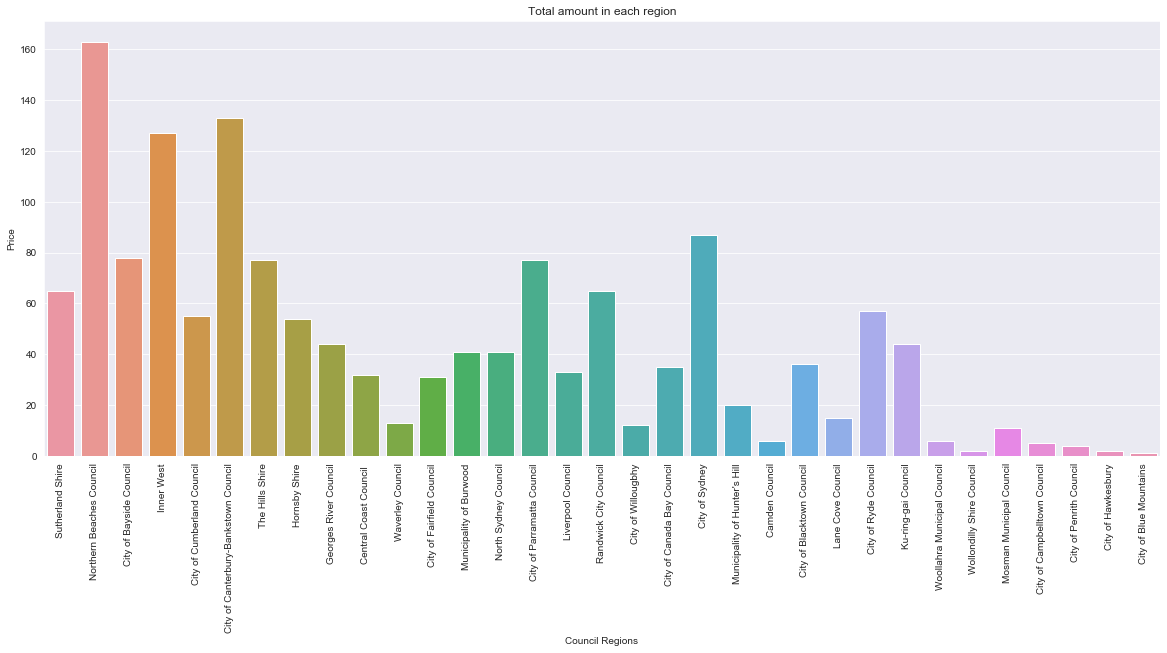

In [14]:
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.countplot(x="councilRegion", data=houseSales)
ax.set(title='Total amount in each region')
ax.set(ylabel='Price')
ax.set(xlabel='Council Regions')
plt.xticks(rotation=90)

From our obseravtion of this data, we can see most of the region having at least 10 houses solded

## Average cost in each region

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

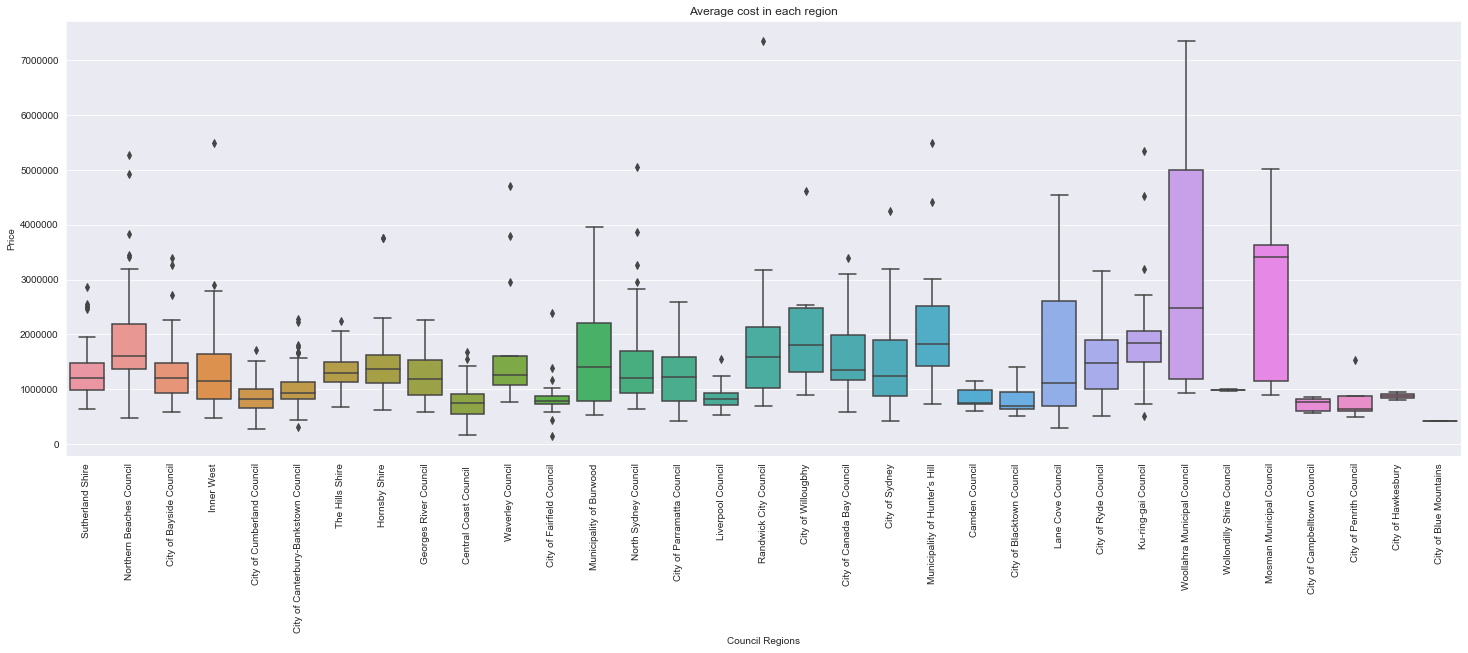

In [15]:
fig, ad = plt.subplots(figsize=(25,8))
ad = sns.boxplot(x=houseSales['councilRegion'], y=houseSales['price'])
ad.set(title='Average cost in each region')
ad.set(ylabel='Price')
ad.set(xlabel='Council Regions')
plt.xticks(rotation=90)
#sns.distplot(df['price'], hue=df['suburb'], kde=False, rug=True);

### Overall view of cost

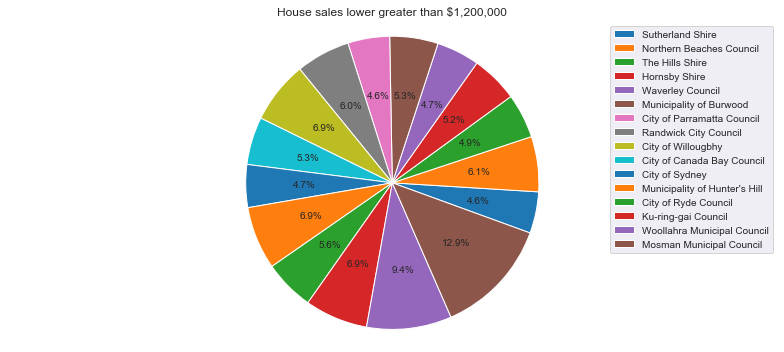

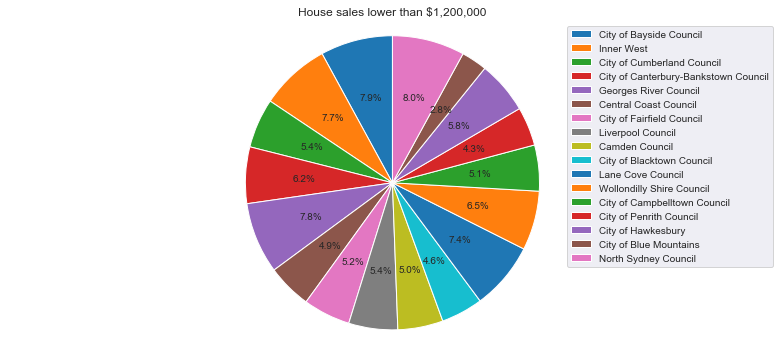

In [16]:
#Pie chart for greater than median
councilGreat = ['Sutherland Shire', 'Northern Beaches Council', 'The Hills Shire', 'Hornsby Shire',
                "Waverley Council", 'Municipality of Burwood', 'City of Parramatta Council',
                'Randwick City Council', 'City of Willougbhy', 'City of Canada Bay Council', 'City of Sydney',
                "Municipality of Hunter's Hill", 'City of Ryde Council', 'Ku-ring-gai Council','Woollahra Municipal Council', 
                'Mosman Municipal Council'
               ]
fig1, ax1 = plt.subplots(figsize=(11,5))
plt.title("House sales lower greater than $1,200,000")

slices_councilG = [1210000, 1611000, 1300000, 1375000, 1255000, 1410000, 1220000, 1580000, 1815000, 1393250, 1250000,
                  1837500, 1475000, 1837500, 2481000, 3410000]

patches, texts, autotexts = ax1.pie(slices_councilG,autopct='%1.1f%%', startangle=340,)
plt.legend(patches, councilGreat, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

#Pie chart for less than median

councilLess = ['City of Bayside Council', 'Inner West', 'City of Cumberland Council','City of Canterbury-Bankstown Council',
               'Georges River Council','Central Coast Council',  'City of Fairfield Council', 'Liverpool Council',
               'Camden Council', 'City of Blacktown Council', 'Lane Cove Council', 'Wollondilly Shire Council', 
               'City of Campbelltown Council', 'City of Penrith Council', 'City of Hawkesbury', 'City of Blue Mountains',
               'North Sydney Council'
              ]

slices_councilL =[1202500, 1162500, 823000, 940000, 1185000, 742500,785000, 815000, 753500, 696000, 1122000, 985500,
                  765000, 646250, 875000, 430000, 1205000]



fig2, ax2 = plt.subplots(figsize=(11,5))
plt.title("House sales lower than $1,200,000")
patches, texts, autotexts = ax2.pie(slices_councilL,autopct='%1.1f%%', startangle=90,)
plt.legend(patches, councilLess, loc="best")
ax2.axis('equal')  
plt.tight_layout()
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

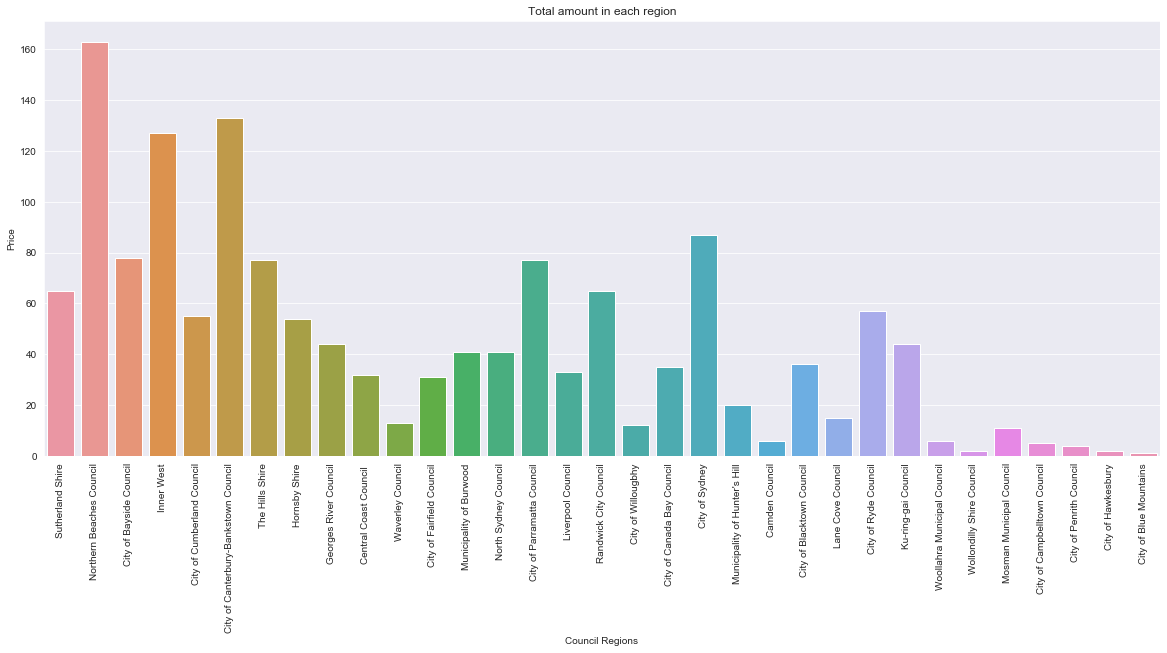

In [17]:
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.countplot(x="councilRegion", data=houseSales)
ax.set(title='Total amount in each region')
ax.set(ylabel='Price')
ax.set(xlabel='Council Regions')
plt.xticks(rotation=90)

### Correlations

In [18]:
houseSales.head()

,bathrooms,bedrooms,carspaces,price,postcode,propertyType,suburb,combinedNumber,suburb#,councilRegion
1,2.0,4,2.0,1195000.0,2234,House,Alfords Point,16,2,Sutherland Shire
2,2.0,2,1.0,1605000.0,2100,House,Allambie Heights,9,3,Northern Beaches Council
3,1.0,3,1.0,1447000.0,2205,House,Arncliffe,47,6,City of Bayside Council
4,2.0,4,2.0,1810000.0,2131,House,Ashfield,214,10,Inner West
5,1.0,2,1.0,1070000.0,2144,House,Auburn,49,11,City of Cumberland Council


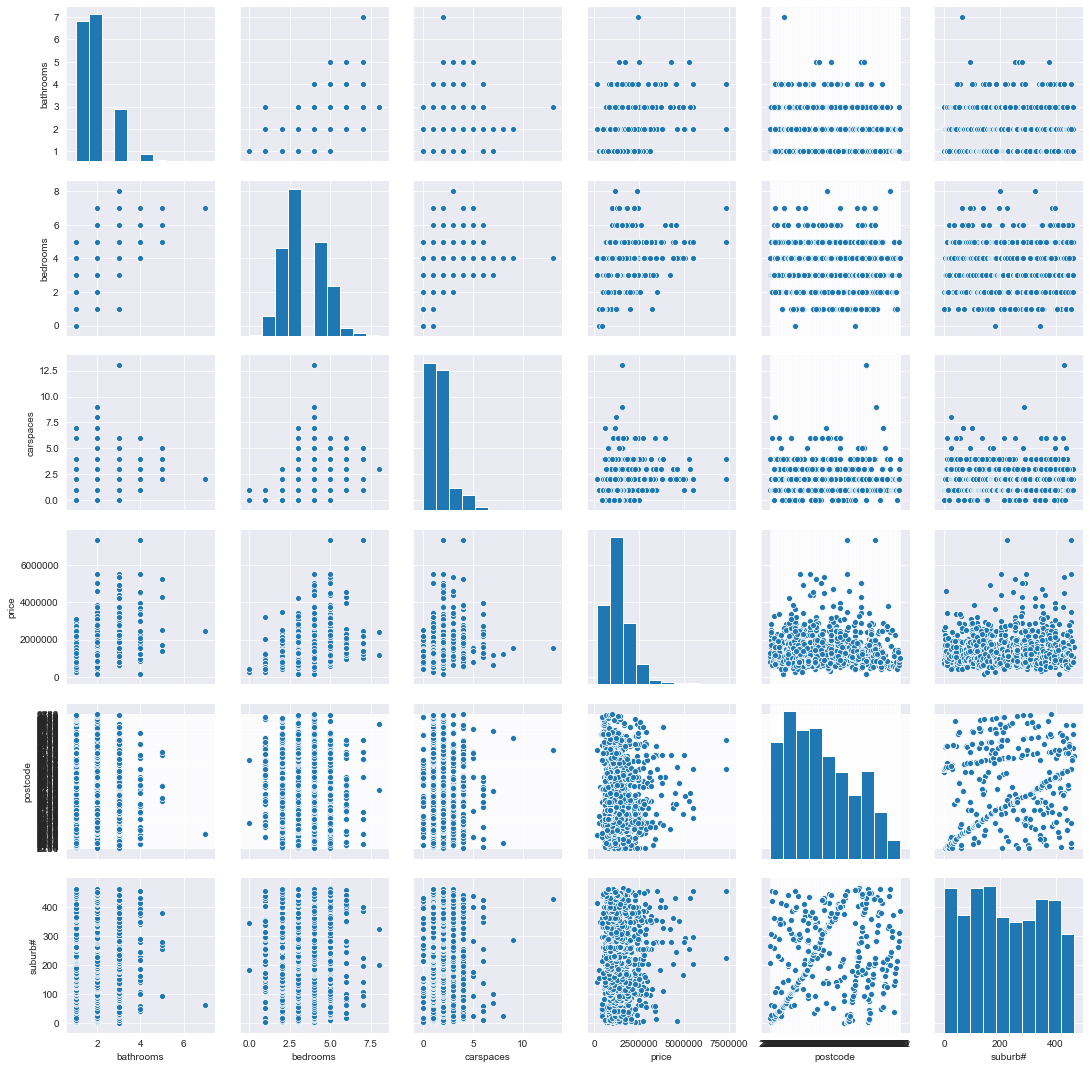

In [19]:
sns.pairplot(houseSales)
plt.show()

### 3D representation of relationship between each features

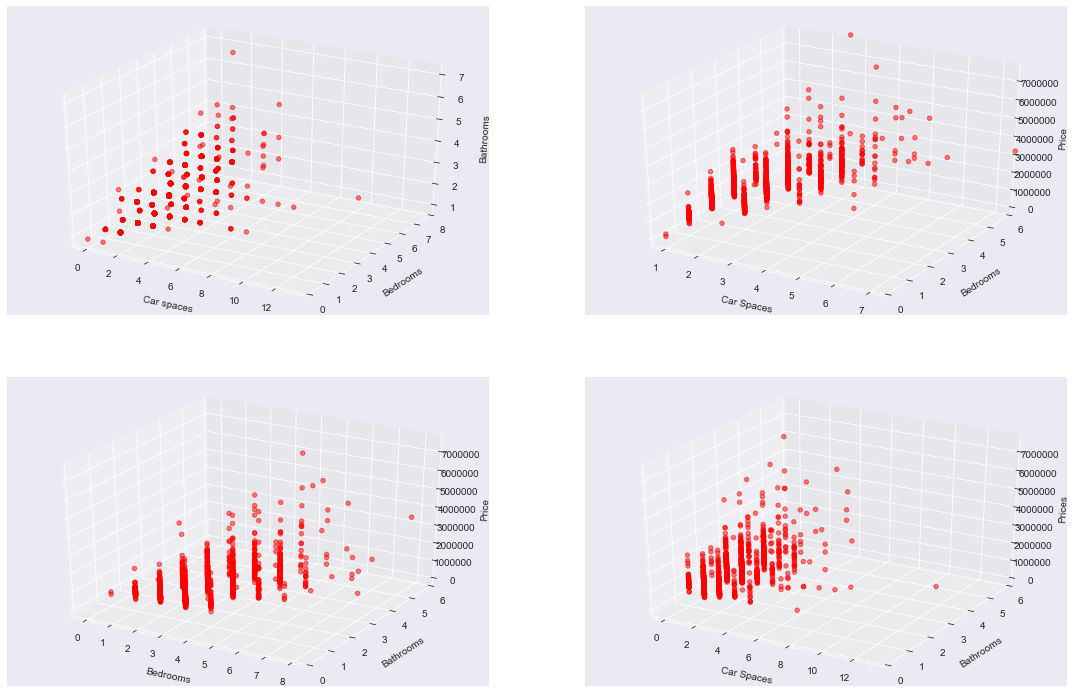

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,1, projection="3d")
ax.scatter(houseSales['carspaces'],houseSales['bedrooms'],houseSales['bathrooms'],c="red",alpha=0.5)
ax.set(xlabel='\nCar spaces',ylabel='\nBedrooms',zlabel='\nBathrooms')
ax.set(ylim=[0,8])

ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(houseSales['bathrooms'],houseSales['bedrooms'],houseSales['price'],c="red",alpha=0.5)
ax.set(xlabel='\nCar Spaces',ylabel='\nBedrooms',zlabel='\nPrice')
ax.set(ylim=[0,6])

ax=fig.add_subplot(2,2,3, projection="3d")
ax.scatter(houseSales['bedrooms'],houseSales['bathrooms'],houseSales['price'],c="red",alpha=0.5)
ax.set(xlabel='\nBedrooms',ylabel='\nBathrooms',zlabel='\nPrice')
ax.set(ylim=[0,6])

ax=fig.add_subplot(2,2,4, projection="3d")
ax.scatter(houseSales['carspaces'],houseSales['bathrooms'],houseSales['price'],c="red",alpha=0.5)
ax.set(xlabel='\nCar Spaces',ylabel='\nBathrooms',zlabel='\nPrices')
ax.set(ylim=[0,6]);

We can see that there is a weak correlation with the cost of a house, and the number of bedrooms and bathrooms the house has, which is unexpected, this is due to location being the biggest factor. Furthermore, we can see that the greater bedrooms a house has, there is an increased chance of it having a greater number of bathrooms. There also seems to be a strong correlation with the number carspaces, and the rise in the cost of the house price. 

### Logistic Regression using 'bathrooms', 'bedrooms', 'carspaces', 'price'

In [21]:
data = houseSales[['bathrooms', 'bedrooms', 'carspaces', 'price']].copy()

In [22]:
pd.set_option('display.max_rows', data.shape[0]+1)
df['bathrooms'] = df['bathrooms'].replace(np.nan, '', regex=True)
data.head(10)

,bathrooms,bedrooms,carspaces,price
1,2.0,4,2.0,1195000.0
2,2.0,2,1.0,1605000.0
3,1.0,3,1.0,1447000.0
4,2.0,4,2.0,1810000.0
5,1.0,2,1.0,1070000.0
7,2.0,3,2.0,1490000.0
10,2.0,5,1.0,1546000.0
11,2.0,6,2.0,1210000.0
12,2.0,5,3.0,815000.0
13,2.0,4,1.0,1147000.0


In [23]:
y = data['price']
X = data.drop(['price'], axis=1)
logreg = linear_model.LogisticRegression()

logreg.fit(X, y)

estimator = LogisticRegression()

selector = RFE(estimator, 3)
selector = selector.fit(X, y)

y_pred = selector.predict(X)
print("MSE: ", mean_squared_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))
print("Accuracy Score: ", accuracy_score(y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y, y_pred))

MSE:  560672149934.1963
R^2:  0.012405528850673142
Accuracy Score:  0.021739130434782608
Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
logreg.predict(X[:10])

array([1400000., 1100000., 1350000., 1400000.,  860000., 1400000.,
       1200000., 1210000., 1400000., 1200000.])

In [25]:
print(X[:10])

    bathrooms  bedrooms  carspaces
1         2.0         4        2.0
2         2.0         2        1.0
3         1.0         3        1.0
4         2.0         4        2.0
5         1.0         2        1.0
7         2.0         3        2.0
10        2.0         5        1.0
11        2.0         6        2.0
12        2.0         5        3.0
13        2.0         4        1.0


In [26]:
print(y[:10])

1     1195000.0
2     1605000.0
3     1447000.0
4     1810000.0
5     1070000.0
7     1490000.0
10    1546000.0
11    1210000.0
12     815000.0
13    1147000.0
Name: price, dtype: float64


##### Looking at these results above we can see that this model is not very accurate. We are simply using bathrooms, bedrooms and carspaces as variables for prediction but looking at the predicted results you can see there are some big differences in the price predictions. The reason for this comes down to suburb and location as this greatly affects real world prices on houses

In [27]:
logreg.coef_

array([[ 0.10970008, -1.32888992, -0.79154482],
       [-0.88378583, -1.28719064, -0.43892152],
       [-1.07305442, -1.67917689, -0.6076244 ],
       ...,
       [ 0.19194103, -0.45308065, -1.08343046],
       [-0.066708  , -1.04365934, -0.91936254],
       [-1.73485291, -0.46707247, -0.09006771]])

# Price plot for each record

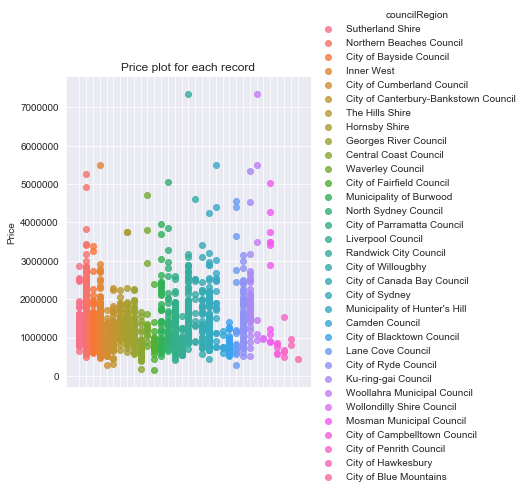

In [28]:
ax = sns.lmplot(x='councilRegion', y='price', data=houseSales, hue='councilRegion', fit_reg=False)
ax.set(xticklabels=[])
ax.set(xlabel=None)
ax.set(ylabel='Price')
ax.set(title='Price plot for each record')


## Logistic Regression using 'suburb#', 'bathrooms', 'bedrooms', 'carspaces', 'price'

In [29]:
data_s = houseSales[['suburb#', 'bathrooms', 'bedrooms', 'carspaces', 'price']].copy()

In [30]:
y = data_s['price']
X = data_s.drop(['price'], axis=1)
logreg = linear_model.LogisticRegression()

logreg.fit(X, y)

estimator = LogisticRegression()

selector = RFE(estimator, 3)
selector = selector.fit(X, y)

y_pred = selector.predict(X)
print("MSE: ", mean_squared_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))
print("Accuracy Score: ", accuracy_score(y, y_pred))

MSE:  560672149934.1963
R^2:  0.012405528850673142
Accuracy Score:  0.021739130434782608


## Logistic Regression using 'postcode', 'bathrooms', 'bedrooms', 'carspaces', 'price'

In [31]:
data_p = houseSales[['postcode', 'bathrooms', 'bedrooms', 'carspaces', 'price']].copy()

In [32]:
y = data_p['price']
X = data_p.drop(['price'], axis=1)
logreg = linear_model.LogisticRegression()

logreg.fit(X, y)

estimator = LogisticRegression()

selector = RFE(estimator, 3)
selector = selector.fit(X, y)

y_pred = selector.predict(X)
print("MSE: ", mean_squared_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))
print("Accuracy Score: ", accuracy_score(y, y_pred))

MSE:  560672149934.1963
R^2:  0.012405528850673142
Accuracy Score:  0.021739130434782608


## lmplots showing the average price, carspaces, bedrooms and bathrooms for each council

In [33]:
councilList = ['City of Canada Bay Council', 'City of Parramatta Council', 'City of Penrith Council', 'Randwick City Council', 'City of Ryde Council', 'City of Sydney', 'Sutherland Shire', 'Waverley Council', 'City of Willougbhy', 'Wollondilly Shire Council', 'Woollahra Municipal Council', 'City of Bayside Council', 'City of Blacktown Council', 'City of Blue Mountains', 'Municipality of Burwood', 'Camden Council', 'City of Campbelltown Council', 'Central Coast Council ', 'City of Cumberland Council', 'City of Fairfield Council', 'Georges River Council', 'City of Hawkesbury', 'The Hills Shire', 'Hornsby Shire', 'Inner West', 'Lane Cove Council', 'Liverpool Council', 'Mosman Municipal Council', 'North Sydney Council', 'Northern Beaches Council']

In [34]:
d = {}
for name in councilList:
    d[name] = pd.DataFrame()
    d[name] = houseSales[houseSales['councilRegion']==name]
    d[name] = d[name].drop(['postcode'], axis=1)
    d[name] = d[name].drop(['suburb'], axis=1)
    d[name] = d[name].drop(['combinedNumber'], axis=1)
    d[name] = d[name].drop(['suburb#'], axis=1)
    d[name] = d[name].drop(['councilRegion'], axis=1)
    

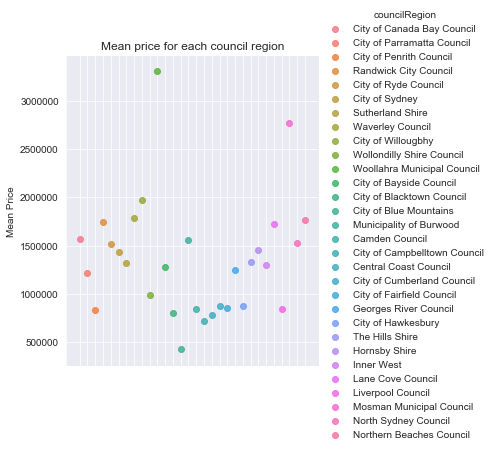

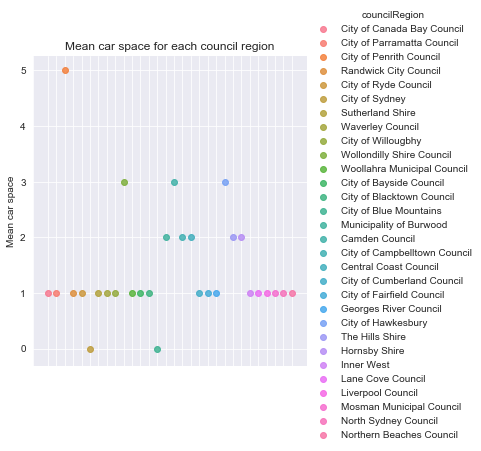

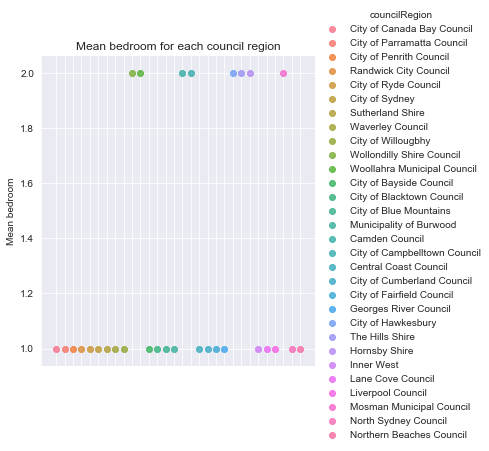

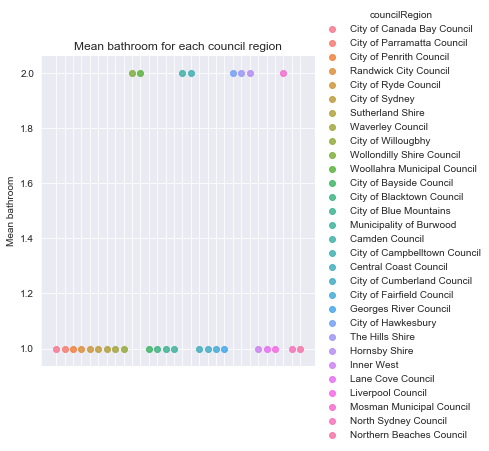

In [35]:
councildf = pd.DataFrame()
councildf['councilRegion'] = councilList

meanprice = []
for name in councilList:
    meanprice.append(int(d[name]['price'].mean()))
    
councildf['meanprice'] = meanprice

meancarspaces = []
for name in councilList:
    meancarspaces.append(int(d[name]['carspaces'].mean()))
    
councildf['meancarspaces'] = meancarspaces

meanbedrooms = []
for name in councilList:
    meanbedrooms.append(int(d[name]['bathrooms'].mean()))
    
councildf['meanbedrooms'] = meanbedrooms

meanbathrooms = []
for name in councilList:
    meanbathrooms.append(int(d[name]['bathrooms'].mean()))

councildf['meanbathrooms'] = meanbathrooms
ax = sns.lmplot(x='councilRegion', y='meanprice', data=councildf, hue='councilRegion', fit_reg=False)
ax.set(xticklabels=[])
ax.set(xlabel=None)
ax.set(ylabel='Mean Price')
ax.set(title='Mean price for each council region')
ac = sns.lmplot(x='councilRegion', y='meancarspaces', data=councildf, hue='councilRegion', fit_reg=False)
ac.set(xticklabels=[])
ac.set(xlabel=None)
ac.set(ylabel='Mean car space')
ac.set(title='Mean car space for each council region')
av = sns.lmplot(x='councilRegion', y='meanbedrooms', data=councildf, hue='councilRegion', fit_reg=False)
av.set(xticklabels=[])
av.set(xlabel=None)
av.set(ylabel='Mean bedroom')
av.set(title='Mean bedroom for each council region')
ab = sns.lmplot(x='councilRegion', y='meanbathrooms', data=councildf, hue='councilRegion', fit_reg=False)
ab.set(xticklabels=[])
ab.set(xlabel=None)
ab.set(ylabel='Mean bathroom')
ab.set(title='Mean bathroom for each council region')

## Removes 'propertyType' column from councilList for RFE

In [36]:
for name in councilList:
    d[name] = d[name].drop(['propertyType'], axis=1)

## Calculates the MSE, R^2 and Accuracy for each council with those that do not have enough data removed

In [37]:
councilsWithoutMSE = []
councilLogReg = pd.DataFrame()
councilMSE = []
councilR2 = []
councilAccuracy = []
for name in councilList:
    if len(d[name].index) <= 3:
        councilsWithoutMSE.append(name)
councilsWithMSE = [x for x in councilList if x not in councilsWithoutMSE]

for name in councilsWithMSE:
    y = d[name]['price']
    X = d[name].drop(['price'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
    logreg = linear_model.LogisticRegression()

    logreg.fit(X_train, y_train)

    estimator = LogisticRegression()

    selector = RFE(estimator, 3)
    selector = selector.fit(X, y)

    y_pred = selector.predict(X)
    councilMSE.append(mean_squared_error(y, y_pred))
    councilR2.append(r2_score(y, y_pred))
    councilAccuracy.append(accuracy_score(y, y_pred))

councilLogReg['councilRegion'] = councilsWithMSE
councilLogReg['MSE'] = councilMSE
councilLogReg['R^2'] = councilR2
councilLogReg['Accuracy'] = councilAccuracy

In [38]:
pd.set_option('float_format', '{:f}'.format)
councilLogReg

,councilRegion,MSE,R^2,Accuracy
0,City of Canada Bay Council,782625864285.714233,-0.902278,0.171429
1,City of Parramatta Council,484263751339.428589,-1.031789,0.051948
2,City of Penrith Council,208392250000.000000,-0.204549,0.750000
3,Randwick City Council,5448031480769.230469,-4.853012,0.092308
4,City of Ryde Council,713869144736.842163,-0.793723,0.105263
5,City of Sydney,654675672413.793091,-0.353059,0.068966
6,Sutherland Shire,270586332923.092316,-0.290693,0.138462
7,Waverley Council,7852972384615.384766,-4.573846,0.230769
8,City of Willougbhy,4209140833333.333496,-3.415086,0.250000
9,Woollahra Municipal Council,8985074000000.000000,-0.535151,0.333333


## Councils that were removed from RSME

In [39]:
councilsWithoutMSE

['Wollondilly Shire Council', 'City of Blue Mountains', 'City of Hawkesbury']

### Linear Regression

In [40]:
# drop date and add the essential features
feature_col = np.array(['bathrooms', 'bedrooms', 'carspaces', 'postcode'])
X=houseSales[feature_col]
y=houseSales['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("y = ", model.coef_,"* X + ",model.intercept_)
print("MSE:", mean_squared_error (y_test, pred))
print("R^2:", r2_score(y_test,pred))

y =  [212892.2966387  196639.92163781  73696.23996543  -2542.06869263] * X +  5668461.425963729
MSE: 329540715610.6179
R^2: 0.3267121594493295


### Training a LogisticRegression classifier and report the accuracy on the training and test data

In [41]:
logreg = LogisticRegression().fit(X_train, y_train)
#prediction

y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

#Accuracy score for test
from sklearn.metrics import accuracy_score
print("Accuracy for test data: ", accuracy_score(y_test, y_pred_test))
print("Accuracy for train data: ", accuracy_score(y_train, y_pred_train))

Accuracy for test data:  0.003389830508474576
Accuracy for train data:  0.0237892948173322


### Recursive Feature Elimination

In [42]:
#fit my selected variables
estimator = LinearRegression()
selector = RFE(estimator, 6)
selector = selector.fit(X_train,y_train)
supp = selector.get_support()
print("Selected features:",feature_col[supp])
print("Coeffs:", selector.estimator_.coef_)

# test model
predicted = selector.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, predicted)))
print("R^2:", r2_score(y_test, predicted), "\n")

Selected features: ['bathrooms' 'bedrooms' 'carspaces' 'postcode']
Coeffs: [212892.2966387  196639.92163781  73696.23996543  -2542.06869263]
RMSE: 574056.3697152205
R^2: 0.3267121594493295 

